# Ejercicio 2

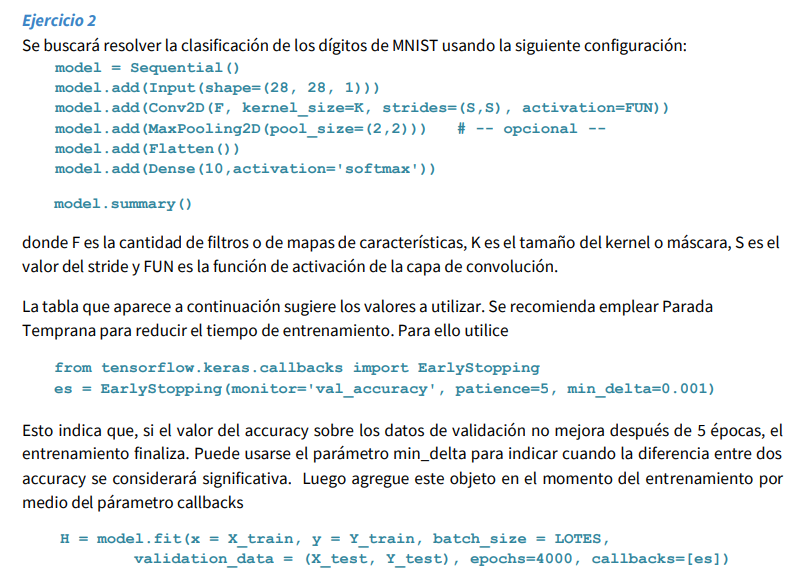

### Lectura de datos e importe de librerias

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

### Preparacion de dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #cargo el dataset de tensorflow

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

In [4]:
# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

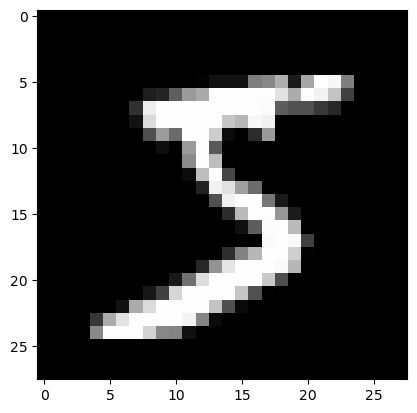

In [5]:
# nro. de imagen a visualizar
plt.imshow(X_train[0, :,:], cmap='gray')

In [6]:
# normalización
X_train = X_train / 255
X_test  = X_test  / 255

In [ ]:
#PARAMETROS
K = (3,3)
S = 2
FUN = 'relu'
LOTES = 32
EPOCAS = 4000
filtros = 64

In [7]:
# %% Construccion del modelo
model = Sequential()
model.add(Input(shape=(28, 28, 1))) 
model.add(Conv2D(filtros, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(2,2))) #opcional
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compilacion
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

#
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

#entrenamiento

H = model.fit(x = X_train, y = Y_train, batch_size = LOTES,
validation_data = (X_test, Y_test), epochs=EPOCAS, callbacks=[es]) 

#print (X_train.shape)
pred = model.predict(X_train)


Epoch 1/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8480 - loss: 0.5219 - val_accuracy: 0.9633 - val_loss: 0.1196
Epoch 2/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9656 - loss: 0.1194 - val_accuracy: 0.9741 - val_loss: 0.0830
Epoch 3/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.0866 - val_accuracy: 0.9758 - val_loss: 0.0766
Epoch 4/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9767 - loss: 0.0748 - val_accuracy: 0.9794 - val_loss: 0.0631
Epoch 5/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0644 - val_accuracy: 0.9797 - val_loss: 0.0650
Epoch 6/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9814 - loss: 0.0581 - val_accuracy: 0.9803 - val_loss: 0.0623
Epoch 7/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0496 - val_accuracy: 0.9772 - val_loss: 0.0682
Epoch 8/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 

In [9]:
# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\n(ACCURACY) Efectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("(ACCURACY) Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))


(ACCURACY) Efectividad del modelo con datos de entrenamiento:  99.23%
(ACCURACY) Efectividad del modelo con datos de Prueba.......:  98.21%


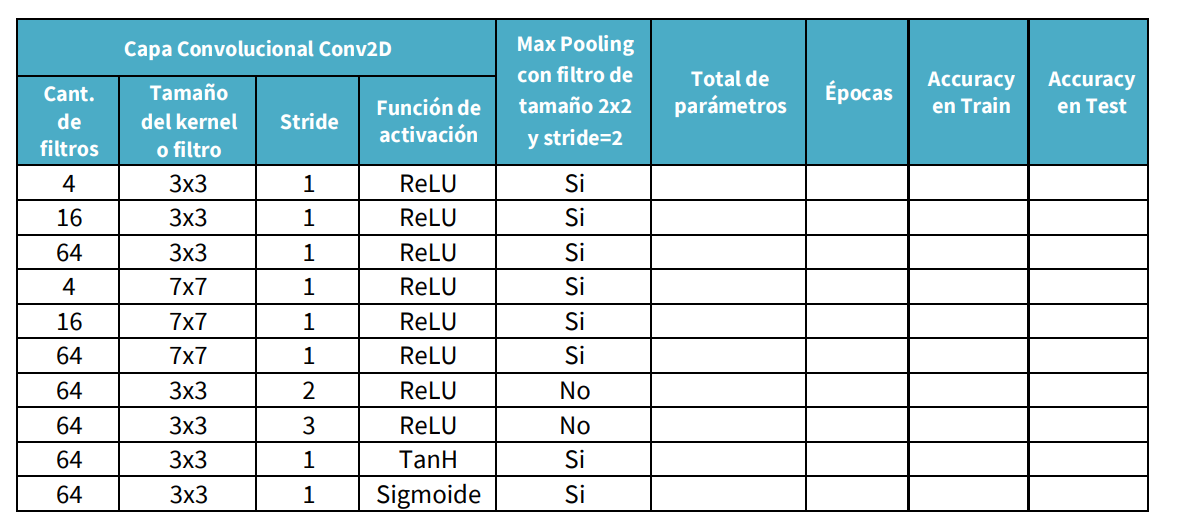